# <center> **Fitting distributions to data** </center>
## <font size=4> **Inteligencia Artificial 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

In [2]:
import warnings
warnings.filterwarnings('ignore')

En este notebook vamos a usar la librería de $\texttt{scipy.stats}$ para generar datos aleatorios. Vamos a considerar el caso de varias variables aleatorias conocidas, algunas discretas y otras continuas.

In [3]:
#Get Data
data = load_diabetes()
X, y_ = data.data, data.target

In [4]:
#Organize Data
SR_y = pd.Series(y_, name="y_ (Target Vector Distribution)")

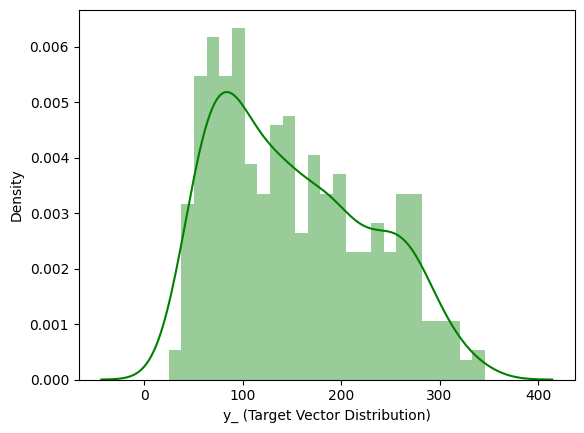

In [5]:
#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="g", ax=ax)
plt.show()

In [6]:
def get_best_distribution(data, dist_names):
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print('p value for ' + dist_name + ' = ' + str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    
    # store the name of the best fit and its p value
    print('\nBest fitting distribution: ' + str(best_dist))
    print('Best p value: ' + str(best_p))
    print('Parameters for the best fit: ' + str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [7]:
dist_names = ['norm', 'beta', 'gumbel_r', 'exponweib', 'weibull_max', 'weibull_min', 'pareto', 'genextreme']

In [8]:
dist, pbest, params = get_best_distribution(y_, dist_names)

p value for norm = 0.0005340021804681527
p value for beta = 0.1148654054538194
p value for gumbel_r = 0.04542137999372975
p value for exponweib = 0.08979805945861341
p value for weibull_max = 7.814704433572344e-303
p value for weibull_min = 0.12798618660703176
p value for pareto = 4.044736234589356e-09
p value for genextreme = 0.02933566416065414

Best fitting distribution: weibull_min
Best p value: 0.12798618660703176
Parameters for the best fit: (np.float64(1.7078751778322214), np.float64(23.73272899908566), np.float64(144.02568821979582))


## Ejemplo Weibull Min

In [9]:
np.random.seed(12345)       # siempre es adecuado establecer una semilla para efectos de replicabilidad.

In [10]:
# Generar una muestra de una variable Weibull Min
# de tamaño N = 450

N = 450
c, loc, scale = params
sample = st.weibull_min.rvs(c, loc, scale, size=N)

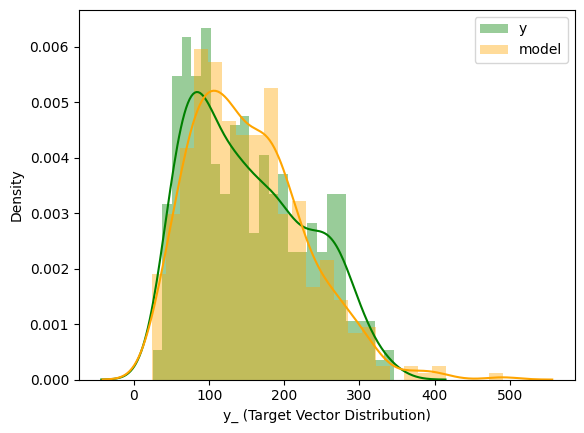

In [11]:
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="g", ax=ax, label='y')
sns.distplot(sample, bins=25, color="orange", ax=ax, label='model')
plt.legend()
plt.show()

In [12]:
print(y_.shape, sample.shape)

(442,) (450,)


In [13]:
D, p = st.kstest(y_, sample)

In [14]:
print(D, p)

0.06220211161387632 0.33452510129672053
